<a href="https://colab.research.google.com/github/DikshantPatel2210/Song-Popularity-Prediction/blob/main/Song_Popularity_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math as math
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display

from statsmodels.formula import api
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import  PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10,6]

import warnings
warnings.filterwarnings("ignore")


In [ ]:
df = pd.read_csv("/content/song_data.csv")
df

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,Let It Breathe,60,159645,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348,113.969,4,0.300
18831,Answers,60,205666,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301,94.286,4,0.265
18832,Sudden Love (Acoustic),23,182211,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355,130.534,4,0.286
18833,Gentle on My Mind,55,352280,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1,0.0328,106.063,4,0.323


In [ ]:
df.drop(["song_name"], axis = 1 , inplace = True)

target = "song_popularity"
features = [ i for i in df.columns if i not in [target]]

original_df = df.copy(deep = True)

print("\n\033[1m Inference :\033[0m The Dataset consists of {} features & {} samples.".format(df.shape[1], df.shape[0]))


 Inference : The Dataset consists of 14 features & 18835 samples.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_popularity   18835 non-null  int64  
 1   song_duration_ms  18835 non-null  int64  
 2   acousticness      18835 non-null  float64
 3   danceability      18835 non-null  float64
 4   energy            18835 non-null  float64
 5   instrumentalness  18835 non-null  float64
 6   key               18835 non-null  int64  
 7   liveness          18835 non-null  float64
 8   loudness          18835 non-null  float64
 9   audio_mode        18835 non-null  int64  
 10  speechiness       18835 non-null  float64
 11  tempo             18835 non-null  float64
 12  time_signature    18835 non-null  int64  
 13  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5)
memory usage: 2.0 MB


In [ ]:
df.nunique().sort_values()

audio_mode              2
time_signature          5
key                    12
song_popularity       101
danceability          849
energy               1132
speechiness          1224
audio_valence        1246
liveness             1425
acousticness         3209
instrumentalness     3925
loudness             8416
song_duration_ms    11771
tempo               12112
dtype: int64

###Checking number of unique rows in each features(Numerical & Categorical Fetures)

In [ ]:
nu = df[features].nunique().sort_values()
nf = [] ; cf = [] ;

for i in range(df[features].shape[1]):
  if nu.values[i] <= 16 :
    cf.append(nu.index[i])
  else :
    nf.append(nu.index[i])


print ('\n\033[1m Inference: \033[0m The Dataset has {} numerical & {} categorical features.'.format(len(nf), len(cf)))




 Inference:  The Dataset has 10 numerical & 3 categorical features.


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
song_popularity,18835.0,52.991877,21.905654,0.000000,40.0000,56.000000,69.00000,100.000
song_duration_ms,18835.0,218211.587576,59887.540566,12000.000000,184339.5000,211306.000000,242844.00000,1799346.000
acousticness,18835.0,0.258539,0.288719,0.000001,0.0241,0.132000,0.42400,0.996
danceability,18835.0,0.633348,0.156723,0.000000,0.5330,0.645000,0.74800,0.987
energy,18835.0,0.644995,0.214101,0.001070,0.5100,0.674000,0.81500,0.999
instrumentalness,18835.0,0.078008,0.221591,0.000000,0.0000,0.000011,0.00257,0.997
key,18835.0,5.289196,3.614595,0.000000,2.0000,5.000000,8.00000,11.000
liveness,18835.0,0.179650,0.143984,0.010900,0.0929,0.122000,0.22100,0.986
loudness,18835.0,-7.447435,3.827831,-38.768000,-9.0440,-6.555000,-4.90800,1.585
audio_mode,18835.0,0.628139,0.483314,0.000000,0.0000,1.000000,1.00000,1.000


#2. Exploratory Data Analysis(EDA)

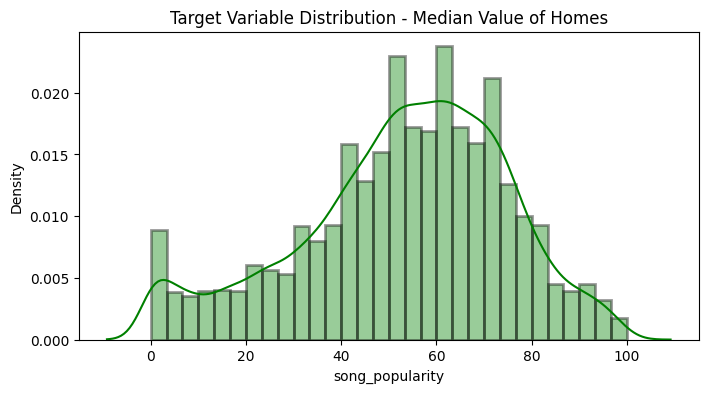

In [ ]:
plt.figure(figsize = [8,4])
sns.distplot(df[target], color = 'g' , hist_kws= dict( edgecolor = "black" , linewidth = 2), bins = 30)
plt.title("Target Variable Distribution - Median Value of Homes")
plt.show()

Inference = The Target variable seems to ne mormally distributed, averaging around 60 units.

                               Visualising Categorical Features:                                


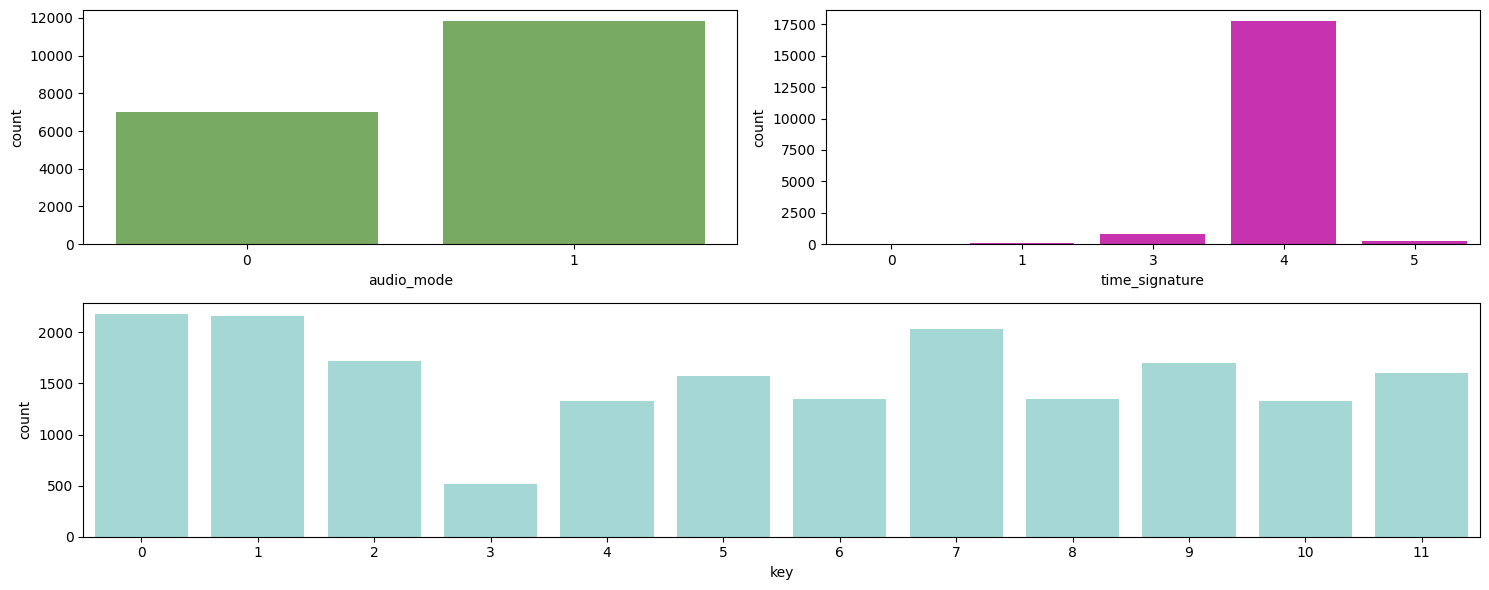

In [ ]:
print('\033[1mVisualising Categorical Features:'.center(100))

n=2
plt.figure(figsize=[15,3*math.ceil(len(cf)/n)])
clr = ["r", "g", "b","g", "b", "r"]
for i in range(len(cf)):
    if df[cf[i]].nunique()<=8:
        plt.subplot(math.ceil(len(cf)/n),n,i+1)
        sns.countplot(x =cf[i] , data = df , color= list(np.random.randint([255, 255, 255])/255))
    else:
        plt.subplot(2,1,2)
        sns.countplot(x = cf[i], data = df , color= list(np.random.randint([255, 255, 255])/255))

plt.tight_layout()
plt.show()

                                 Numeric Features Distribution                                  


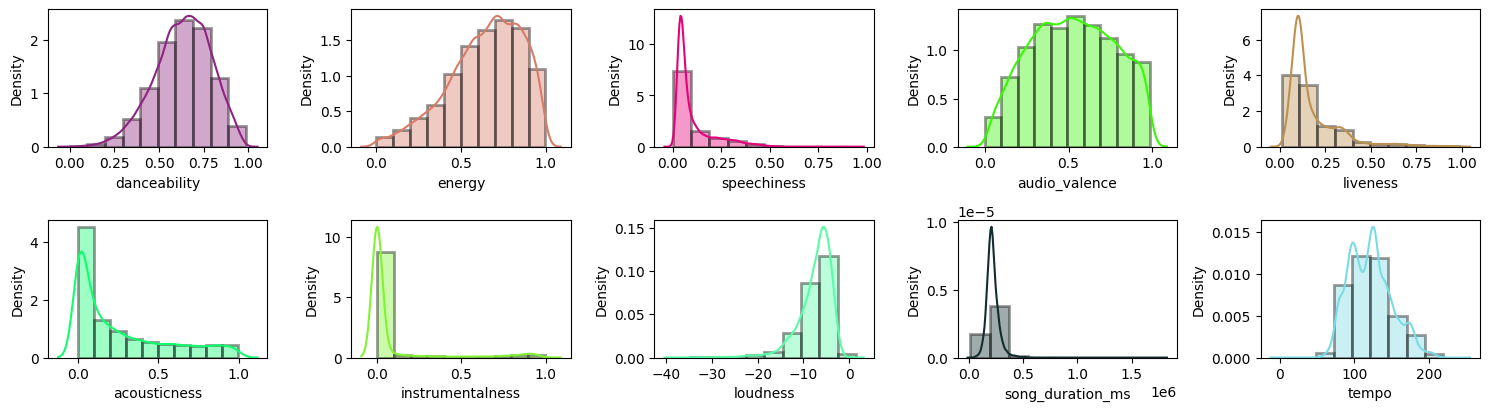

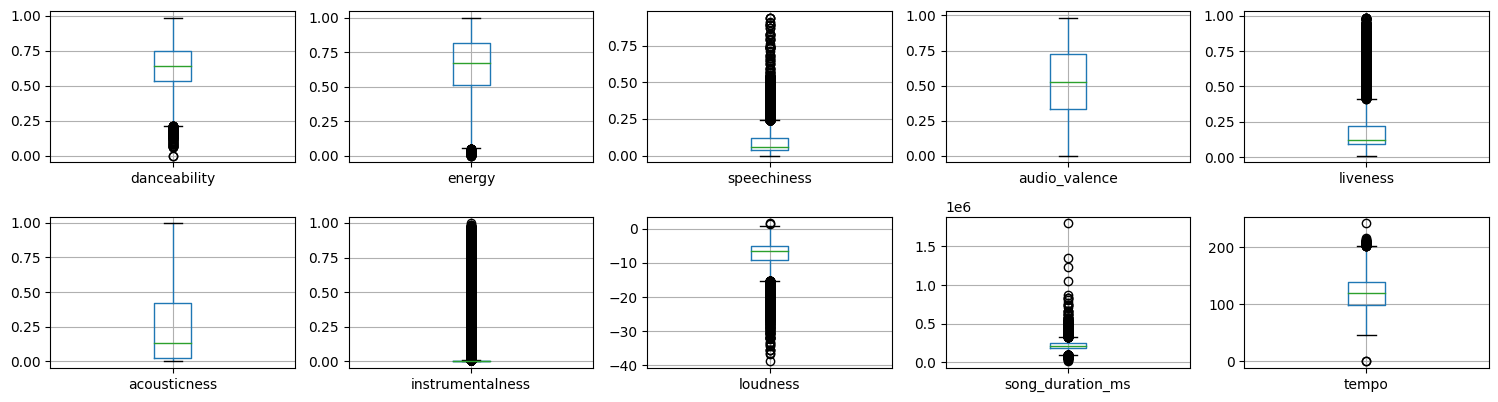

In [ ]:
print("\033[1mNumeric Features Distribution".center(100))

n= 5
clr = ["r", "g", "b","g", "b", "r"]

plt.figure(figsize = [15,4*math.ceil(len(nf)/n)])
for i in range(len(nf)):
  plt.subplot(math.ceil(len(nf)/3),n,i+1)
  sns.distplot(df[nf[i]], hist_kws = dict(edgecolor = "black" , linewidth = 2), bins = 10 , color = list(np.random.randint([255, 255, 255])/255))
plt.tight_layout()
plt.show()

plt.figure(figsize = [15, 4*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    df.boxplot(nf[i])
plt.tight_layout()
plt.show()

**Inference** = There seem th be some outliers. let us fix these in the upcoming section...





# 3.Data Preprocessing

In [ ]:
Counter = 0
rs , cs = original_df.shape

df.drop_duplicates(inplace = True)

if df.shape == (rs, cs) :
  print("\n\033[1mInference:\033[0m The Dataset doesn't have any duplivcates")

else :
  print(f"\n\033[1mInference:\033[0m Number of duplicates dropped/fixed ---> {rs-df.shape[0]}")


Inference: Number of duplicates dropped/fixed ---> 3911


In [ ]:
#Check for empty elements

nvc = pd.DataFrame(df.isnull().sum().sort_values(), columns = ["Total Null Values"])
nvc["Percentage"] = round(nvc["Total Null Values"]/df.shape[0],3)*100
print(nvc)

                  Total Null Values  Percentage
song_popularity                   0         0.0
song_duration_ms                  0         0.0
acousticness                      0         0.0
danceability                      0         0.0
energy                            0         0.0
instrumentalness                  0         0.0
key                               0         0.0
liveness                          0         0.0
loudness                          0         0.0
audio_mode                        0         0.0
speechiness                       0         0.0
tempo                             0         0.0
time_signature                    0         0.0
audio_valence                     0         0.0


In [ ]:
df["audio_mode"].nunique()

2

In [ ]:
for i in range(len(df[cf].columns)):
    col_name = cf[i]
    nunique_value = df[col_name].nunique()
    unique_value_df = pd.DataFrame({'Column Name': [col_name], 'Number of Unique Values': [nunique_value]})
    print(unique_value_df)


  Column Name  Number of Unique Values
0  audio_mode                        2
      Column Name  Number of Unique Values
0  time_signature                        5
  Column Name  Number of Unique Values
0         key                       12


In [ ]:
df.nunique().sort_values()

audio_mode              2
time_signature          5
key                    12
song_popularity       101
danceability          849
energy               1132
speechiness          1224
audio_valence        1246
liveness             1425
acousticness         3209
instrumentalness     3925
loudness             8416
song_duration_ms    11771
tempo               12112
dtype: int64

In [ ]:
#Converting categorical Columns to Numeric

df5 = df.copy()

ecc = nvc[nvc['Percentage']!=0].index.values
fcc = [i for i in cf if i not in ecc]
#One-Hot Binay Encoding
oh=True
dm=True
for i in fcc:
    #print(i)
    if df5[i].nunique()==2:
        if oh==True: print("\033[1mOne-Hot Encoding on features:\033[0m")
        print(i);oh=False
        df5[i]=pd.get_dummies(df5[i], drop_first=True, prefix=str(i) , dtype= int)
    if (df5[i].nunique()>2 and df5[i].nunique()<17):
        if dm==True: print("\n\033[1mDummy Encoding on features:\033[0m")
        print(i);dm=False
        df5 = pd.concat([df5.drop([i], axis=1), pd.DataFrame(pd.get_dummies(df5[i], drop_first=True, prefix=str(i), dtype= int))],axis=1)

df5.shape

One-Hot Encoding on features:
audio_mode

Dummy Encoding on features:
time_signature
key


(14924, 27)

In [ ]:
#Removal of outlier:

df1 = df5.copy()

#features1 = [i for i in features if i not in ['CHAS','RAD']]
features1 = nf

for i in features1:
    Q1 = df1[i].quantile(0.25)
    Q3 = df1[i].quantile(0.75)
    IQR = Q3 - Q1
    df1 = df1[df1[i] <= (Q3+(1.5*IQR))]
    df1 = df1[df1[i] >= (Q1-(1.5*IQR))]
    df1 = df1.reset_index(drop=True)
display(df1.head())
print('\n\033[1mInference:\033[0m\nBefore removal of outliers, The dataset had {} samples.'.format(df5.shape[0]))
print('After removal of outliers, The dataset now has {} samples.'.format(df1.shape[0]))

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,audio_mode,speechiness,...,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
0,73,262333,0.005520,0.496,0.682,0.000029,0.0589,-4.095,1,0.0294,...,0,0,0,0,0,0,1,0,0,0
1,66,216933,0.010300,0.542,0.853,0.000000,0.1080,-6.407,0,0.0498,...,0,1,0,0,0,0,0,0,0,0
2,74,216933,0.026400,0.451,0.970,0.003550,0.1020,-4.938,1,0.1070,...,0,0,0,0,0,0,0,0,0,0
3,56,223826,0.000954,0.447,0.766,0.000000,0.1130,-5.065,1,0.0313,...,0,0,0,0,0,0,0,0,1,0
4,80,235893,0.008950,0.316,0.945,0.000002,0.3960,-3.169,0,0.1240,...,0,0,1,0,0,0,0,0,0,0



Inference:
Before removal of outliers, The dataset had 14924 samples.
After removal of outliers, The dataset now has 8950 samples.


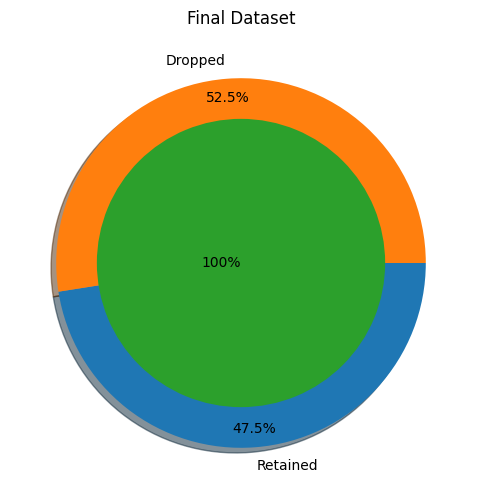


Inference: After the cleanup process, 9885 samples were dropped, while retaining 52.48% of the data.


In [ ]:
#Final Dataset size after performing Preprocessing

df = df1.copy()
df.columns=[i.replace('-','_') for i in df.columns]

plt.title('Final Dataset')
plt.pie([df.shape[0], original_df.shape[0]-df.shape[0]], radius = 1, labels=['Retained','Dropped'], counterclock=False,
        autopct='%1.1f%%', pctdistance=0.9, explode=[0,0], shadow=True)
plt.pie([df.shape[0]], labels=['100%'], labeldistance=-0, radius=0.78)
plt.show()

print(f'\n\033[1mInference:\033[0m After the cleanup process, {original_df.shape[0]-df.shape[0]} samples were dropped, \
while retaining {round(100 - (df.shape[0]*100/(original_df.shape[0])),2)}% of the data.')

# 4.Data Manipulation

In [ ]:
# Splitting the data intro training & testing sets

m = []
for i in df.columns.values:
  m.append( i.replace(" ", "_"))

df.columns = m
X = df.drop([target], axis = 1)
Y = df[target]

Train_X , Test_X , Train_Y , Test_Y = train_test_split(X, Y, test_size = 0.2, random_state = 100)
Train_X.reset_index(drop = True, inplace = True)
print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',Train_X.shape,Train_Y.shape,'\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)


Original set  --->  (8950, 26) (8950,) 
Training set  --->  (7160, 26) (7160,) 
Testing set   --->  (1790, 26)  (1790,)


In [ ]:
#Feature Scaling (Standardization)

std = StandardScaler()

print('\033[1mStandardizatoon on Training set'.center(120))
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns = X.columns)
Train_X_std.describe()

print('\n','\033[1mStandardardization on Testing set'.center(120))
Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

                                          Standardizatoon on Training set                                           

                                          Standardardization on Testing set                                          


,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,audio_mode,speechiness,tempo,...,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
count,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,...,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000
mean,0.036125,-0.014032,0.006938,0.028758,0.010602,-0.058353,0.026948,0.009632,-0.023773,-0.005688,...,-0.012939,0.006781,-0.001628,0.024867,-0.058608,-0.015326,0.025095,0.036205,-0.022964,-0.003066
std,0.971755,0.975985,0.990170,0.974326,1.002490,0.982153,0.979911,0.997307,0.968979,1.002542,...,0.981985,1.019502,0.997564,1.035975,0.896783,0.981478,1.040064,1.048494,0.959254,0.995564
min,-2.491247,-0.918115,-2.932429,-2.934083,-0.342584,-1.543058,-2.781757,-1.348254,-0.972847,-2.236695,...,-0.321568,-0.169516,-0.277225,-0.307354,-0.280135,-0.360378,-0.282448,-0.323942,-0.267161,-0.297450
25%,-0.613785,-0.815321,-0.624756,-0.610649,-0.342584,-0.734631,-0.562450,-1.348254,-0.703373,-0.755222,...,-0.321568,-0.169516,-0.277225,-0.307354,-0.280135,-0.360378,-0.282448,-0.323942,-0.267161,-0.297450
50%,-0.024516,-0.425960,0.064815,0.149849,-0.341076,-0.425551,0.223624,0.741700,-0.412847,-0.021330,...,-0.321568,-0.169516,-0.277225,-0.307354,-0.280135,-0.360378,-0.282448,-0.323942,-0.267161,-0.297450
75%,0.611647,0.586634,0.733904,0.809284,-0.262995,0.373068,0.727351,0.741700,0.323469,0.580851,...,-0.321568,-0.169516,-0.277225,-0.307354,-0.280135,-0.360378,-0.282448,-0.323942,-0.267161,-0.297450
max,2.685640,2.669241,2.345178,1.693583,6.608043,2.852991,2.786427,0.741700,3.368207,2.675691,...,3.109765,5.899152,3.607179,3.253577,3.569706,2.774865,3.540476,3.086975,3.743058,3.361905


,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,audio_mode,speechiness,tempo,...,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
0,-0.071071,-0.881308,-1.007093,0.450511,-0.240041,1.003557,0.645068,0.741700,-0.419162,-0.733445,...,-0.321568,-0.169516,-0.277225,-0.307354,-0.280135,-0.360378,-0.282448,-0.323942,-0.267161,-0.29745
1,-2.358660,1.170858,1.580506,-1.358514,5.749941,0.801801,-1.139338,0.741700,2.757681,-1.651719,...,-0.321568,-0.169516,-0.277225,-0.307354,-0.280135,-0.360378,3.540476,-0.323942,-0.267161,-0.29745
2,0.813936,-0.802925,0.972864,0.405032,-0.340031,-0.375112,1.016111,0.741700,0.551364,0.210131,...,-0.321568,-0.169516,-0.277225,-0.307354,-0.280135,-0.360378,-0.282448,-0.323942,-0.267161,-0.29745
3,0.190898,-0.334817,0.815833,-0.428736,-0.286378,-0.475990,-0.446747,0.741700,2.168207,1.363760,...,-0.321568,-0.169516,-0.277225,-0.307354,-0.280135,-0.360378,-0.282448,-0.323942,-0.267161,-0.29745
4,0.042628,-0.378566,-1.089022,1.218588,-0.215156,2.102009,0.154799,-1.348254,-0.227583,-0.909368,...,-0.321568,-0.169516,-0.277225,-0.307354,-0.280135,-0.360378,3.540476,-0.323942,-0.267161,-0.29745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7155,2.551500,-0.743136,-0.522345,1.587467,-0.342584,-0.752845,1.094872,0.741700,-0.716005,-0.062918,...,-0.321568,-0.169516,-0.277225,-0.307354,-0.280135,-0.360378,-0.282448,3.086975,-0.267161,-0.29745
7156,-0.044242,-0.546268,1.423475,0.657690,-0.342584,1.754539,0.772964,-1.348254,0.545048,-1.050641,...,-0.321568,-0.169516,-0.277225,-0.307354,-0.280135,-0.360378,-0.282448,-0.323942,-0.267161,-0.29745
7157,-0.418973,-0.218155,-0.262902,0.177641,-0.341743,-0.375112,-0.731082,0.741700,-0.894952,-0.568948,...,-0.321568,-0.169516,-0.277225,-0.307354,-0.280135,-0.360378,3.540476,-0.323942,-0.267161,-0.29745
7158,-0.348944,-0.892573,-0.365314,1.046781,-0.342584,1.171687,1.094872,0.741700,-0.149689,0.285664,...,-0.321568,-0.169516,-0.277225,-0.307354,-0.280135,-0.360378,-0.282448,-0.323942,-0.267161,-0.29745


# 5. Feature Selection/Extraction

                                       Correlation Matrix                                       


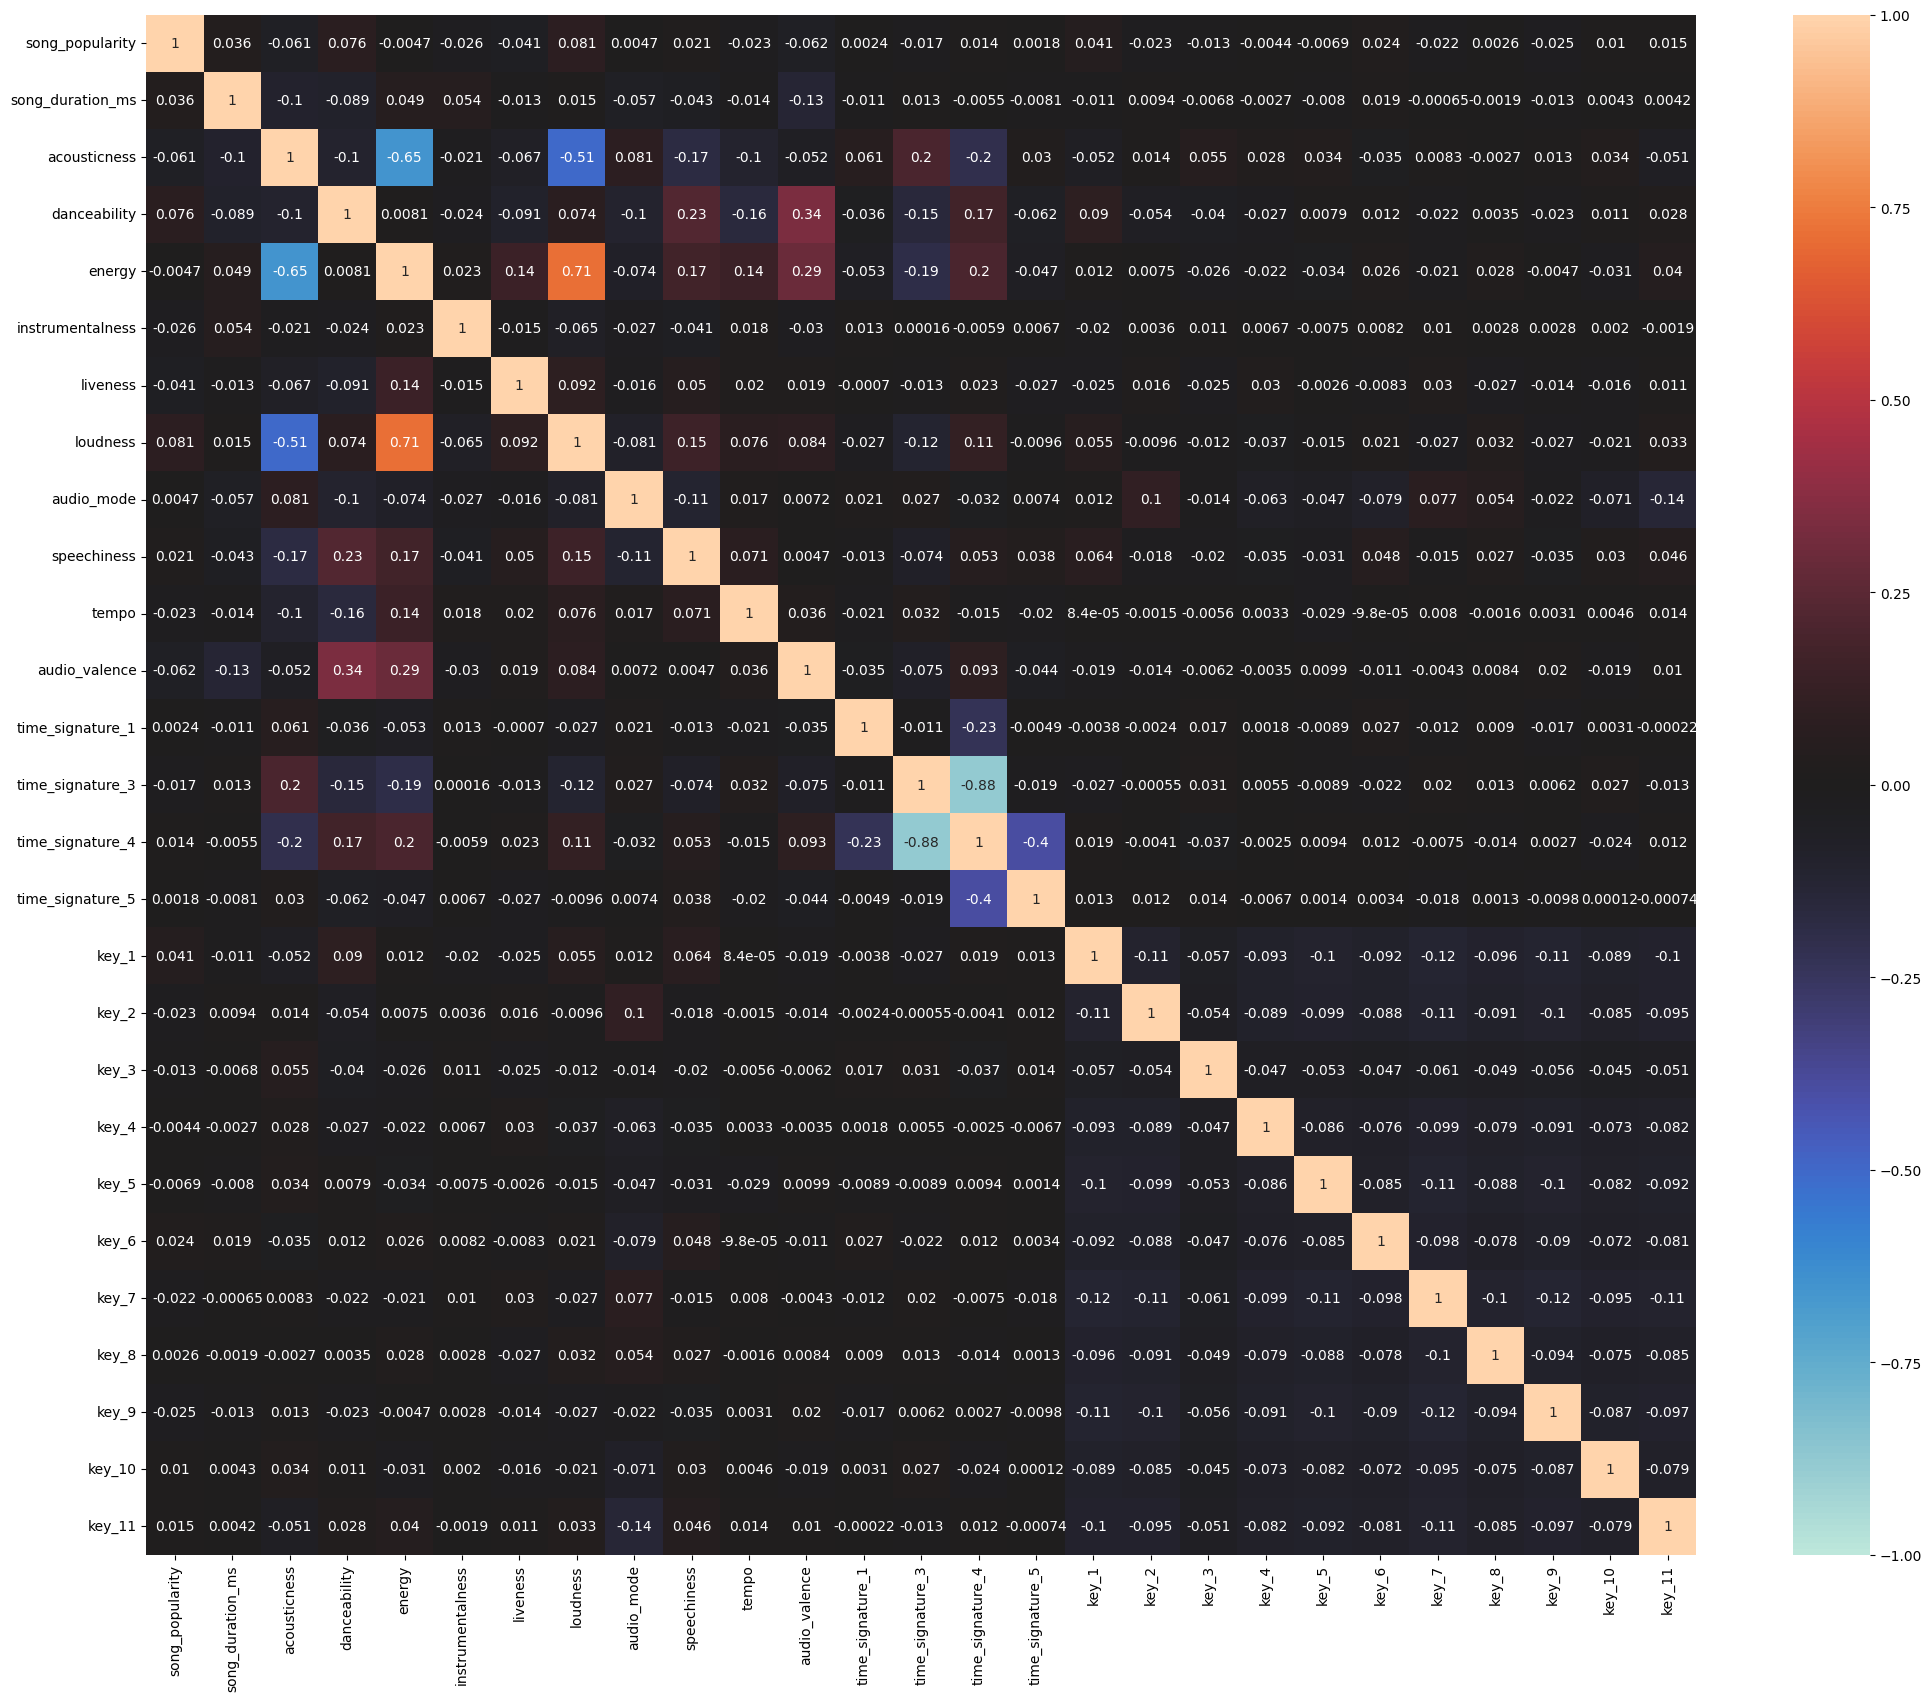

In [ ]:
#Checking the correlation

print ("\033[1m Correlation Matrix".center(100))
plt.figure(figsize = [25,20])
sns.heatmap(df.corr(),annot = True , vmin = -1, vmax = 1, center = 0)
plt.show()

Inference : There seems to be strong multi-correlation between the features. Let us try to fix these...

In [ ]:
#Testing a Linear Regression model with statsmodels

Train_XY = pd.concat([Train_X_std, Train_Y.reset_index(drop = True)],axis = 1)
a = Train_XY.columns.values

API = api.ols(formula='{} ~ {}'.format(target,' + '.join(i for i in Train_X.columns)), data=Train_XY).fit()
print(API.conf_int())
print(API.pvalues)
API.summary()

                          0          1
Intercept         49.826636  50.768336
song_duration_ms   0.196437   1.159544
acousticness      -2.262768  -0.944845
danceability       1.189530   2.318333
energy            -3.464869  -1.701558
instrumentalness  -0.797373   0.155949
liveness          -1.103193  -0.141053
loudness           2.173100   3.574830
audio_mode        -0.053719   0.937547
speechiness       -0.861287   0.151482
tempo             -0.619366   0.354022
audio_valence     -2.044422  -0.906902
time_signature_1  -0.419632   0.503131
time_signature_3  -0.453937   0.171690
time_signature_4  -0.153439   0.342161
time_signature_5  -0.391101   0.484304
key_1             -0.148476   1.081669
key_2             -1.189231   0.018090
key_3             -0.684519   0.355609
key_4             -0.420504   0.745732
key_5             -0.787360   0.412514
key_6             -0.352162   0.818284
key_7             -1.200069   0.052544
key_8             -0.712747   0.451455
key_9             -1.0907

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        song_popularity   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     11.02
Date:                Tue, 23 Jul 2024   Prob (F-statistic):           4.09e-43
Time:                        11:51:51   Log-Likelihood:                -31711.
No. Observations:                7160   AIC:                         6.347e+04
Df Residuals:                    7134   BIC:                         6.365e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           50.2975      0.240    209.404      0.000      49.827      50.768
song_duration_ms     0.6780      0.246      2.760      0.006       0.196       1.160
acousticness        -1.6038      0.336     -4.771      0.000      -2.263      -0.945
danceability         1.7539      0.288      6.092      0.000       1.190       2.318
energy              -2.5832      0.450     -5.744      0.000      -3.465      -1.702
instrumentalness    -0.3207      0.243     -1.319      0.187      -0.797       0.156
liveness            -0.6221      0.245     -2.535      0.011      -1.103      -0.141
loudness             2.8740      0.358      8.038      0.000       2.173       3.575
audio_mode           0.4419      0.253      1.748      0.081      -0.054       0.938
speechiness         -0.3549      0.258     -1.374      0.170      -0.861       0.151
tempo               -0.1327      0.248     -0.534      0.593      -0.619       0.354
audio_valence       -1.4757      0.290     -5.086      0.000      -2.044      -0.907
time_signature_1     0.0417      0.235      0.177      0.859      -0.420       0.503
time_signature_3    -0.1411      0.160     -0.884      0.377      -0.454       0.172
time_signature_4     0.0944      0.126      0.746      0.455      -0.153       0.342
time_signature_5     0.0466      0.223      0.209      0.835      -0.391       0.484
key_1                0.4666      0.314      1.487      0.137      -0.148       1.082
key_2               -0.5856      0.308     -1.902      0.057      -1.189       0.018
key_3               -0.1645      0.265     -0.620      0.535      -0.685       0.356
key_4                0.1626      0.297      0.547      0.585      -0.421       0.746
key_5               -0.1874      0.306     -0.612      0.540      -0.787       0.413
key_6                0.2331      0.299      0.781      0.435      -0.352       0.818
key_7               -0.5738      0.319     -1.796      0.073      -1.200       0.053
key_8               -0.1306      0.297     -0.440      0.660      -0.713       0.451
key_9               -0.4823      0.310     -1.554      0.120      -1.091       0.126
key_10               0.2570      0.295      0.871      0.384      -0.321       0.835
key_11               0.3306      0.306      1.080      0.280      -0.269       0.930
==============================================================================
Omnibus:                      437.955   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              522.571
Skew:                          -0.661   Prob(JB):                    3.35e-114
Kurtosis:                       2.946   Cond. No.                     6.40e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matr

Approach : We can fix these multicolinearity with two techniques:

1. Manual Method - Variance Inflation Factor(VIF)
2. Automatic Method - Recrursive Feature Elimination(RFE)
3.Feature Elimination using PCA Decomposition

# 5a. Manual Method - VIF

Dropped Features -->  ['time_signature_4', 'energy', 'key_7', 'acousticness', 'danceability', 'key_1', 'key_11', 'key_9', 'key_2', 'loudness', 'audio_mode', 'key_5', 'speechiness', 'audio_valence', 'key_4', 'key_6', 'key_3', 'key_8']


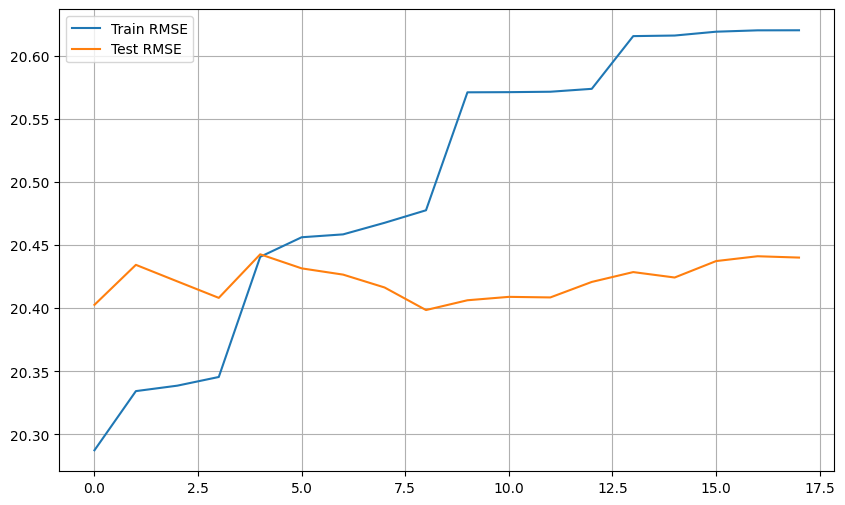

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
Trr=[]; Tss=[]; n=3
order=['ord-'+str(i) for i in range(2,n)]


DROP=[];b=[]

for i in range(len(Train_X_std.columns)):
    vif = pd.DataFrame()
    X = Train_X_std.drop(DROP,axis=1)
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    vif.reset_index(drop=True, inplace=True)
    if vif.loc[0][1]>1:
        DROP.append(vif.loc[0][0])
        LR = LinearRegression()
        LR.fit(Train_X_std.drop(DROP,axis=1), Train_Y)

        pred1 = LR.predict(Train_X_std.drop(DROP,axis=1))
        pred2 = LR.predict(Test_X_std.drop(DROP,axis=1))

        Trr.append(np.sqrt(mean_squared_error(Train_Y, pred1)))
        Tss.append(np.sqrt(mean_squared_error(Test_Y, pred2)))


print('Dropped Features --> ',DROP)


plt.plot(Trr, label='Train RMSE')
plt.plot(Tss, label='Test RMSE')
#plt.ylim([19.75,20.75])
plt.legend()
plt.grid()
plt.show()

# 5b. Automatic Method - RFE

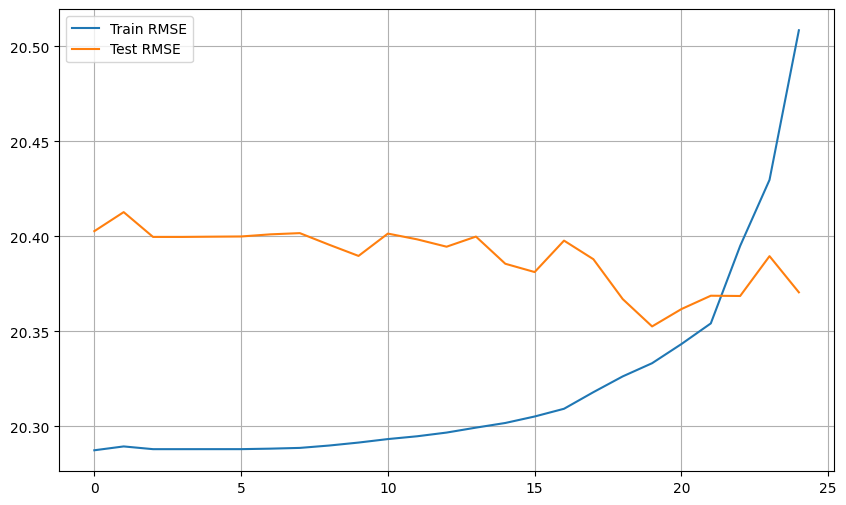

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
Trr=[]; Tss=[]; n=3
order=['ord-'+str(i) for i in range(2,n)]
Trd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
Tsd = pd.DataFrame(np.zeros((10,n-2)), columns=order)

m=df.shape[1]-2
for i in range(m):
    lm = LinearRegression()
    rfe = RFE(lm,n_features_to_select=Train_X_std.shape[1]-i)             # running RFE
    rfe = rfe.fit(Train_X_std, Train_Y)

    LR = LinearRegression()
    LR.fit(Train_X_std.loc[:,rfe.support_], Train_Y)

    pred1 = LR.predict(Train_X_std.loc[:,rfe.support_])
    pred2 = LR.predict(Test_X_std.loc[:,rfe.support_])

    Trr.append(np.sqrt(mean_squared_error(Train_Y, pred1)))
    Tss.append(np.sqrt(mean_squared_error(Test_Y, pred2)))

plt.plot(Trr, label='Train RMSE')
plt.plot(Tss, label='Test RMSE')

plt.legend()
plt.grid()
plt.show()

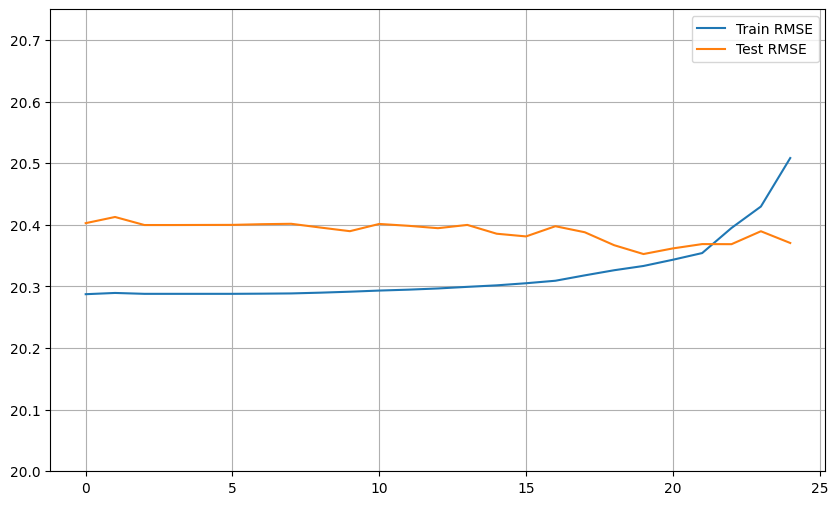

In [ ]:
plt.plot(Trr, label='Train RMSE')
plt.plot(Tss, label='Test RMSE')
plt.ylim([20,20.75])
plt.legend()
plt.grid()
plt.show()

# 5c. Feature Elmination using PCA Decomposition

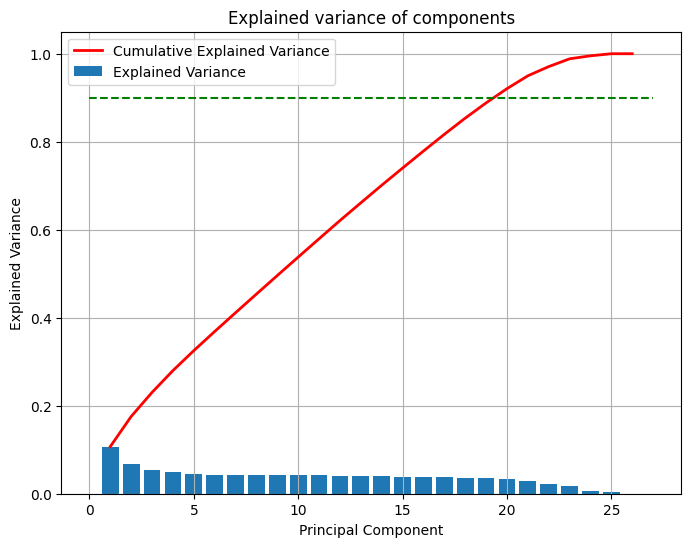

In [ ]:
from sklearn.decomposition import PCA

pca = PCA().fit(Train_X_std)

fig, ax = plt.subplots(figsize=(8,6))
x_values = range(1, pca.n_components_+1)
ax.bar(x_values, pca.explained_variance_ratio_, lw=2, label='Explained Variance')
ax.plot(x_values, np.cumsum(pca.explained_variance_ratio_), lw=2, label='Cumulative Explained Variance', color='red')
plt.plot([0,pca.n_components_+1],[0.9,0.9],'g--')
ax.set_title('Explained variance of components')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance')
plt.legend()
plt.grid()
plt.show()

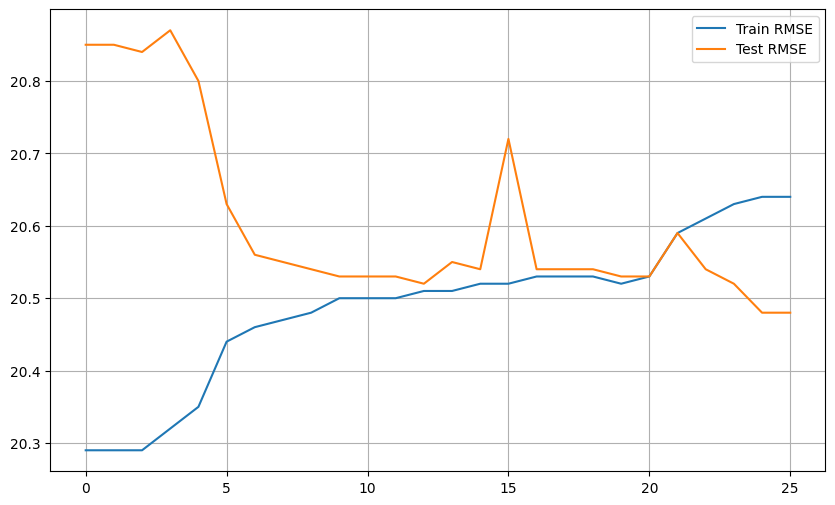

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
Trr=[]; Tss=[]; n=3
order=['ord-'+str(i) for i in range(2,n)]
Trd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
Tsd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
m=df.shape[1]-1

for i in range(m):
    pca = PCA(n_components=Train_X_std.shape[1]-i)
    Train_X_std_pca = pca.fit_transform(Train_X_std)
    Test_X_std_pca = pca.fit_transform(Test_X_std)

    LR = LinearRegression()
    LR.fit(Train_X_std_pca, Train_Y)

    pred1 = LR.predict(Train_X_std_pca)
    pred2 = LR.predict(Test_X_std_pca)

    Trr.append(round(np.sqrt(mean_squared_error(Train_Y, pred1)),2))
    Tss.append(round(np.sqrt(mean_squared_error(Test_Y, pred2)),2))


plt.plot(Trr, label='Train RMSE')
plt.plot(Tss, label='Test RMSE')

plt.legend()
plt.grid()
plt.show()

In [ ]:


lm = LinearRegression()
rfe = RFE(lm,n_features_to_select=Train_X_std.shape[1]-df.shape[1]+10)
rfe = rfe.fit(Train_X_std, Train_Y)

LR = LinearRegression()
LR.fit(Train_X_std.loc[:,rfe.support_], Train_Y)

pred1 = LR.predict(Train_X_std.loc[:,rfe.support_])
pred2 = LR.predict(Test_X_std.loc[:,rfe.support_])

print(np.sqrt(mean_squared_error(Train_Y, pred1)))
print(np.sqrt(mean_squared_error(Test_Y, pred2)))


20.318048532828218
20.388036077109874


# 6. Predictive Modelling

In [ ]:


Model_Evaluation_Comparison_Matrix = pd.DataFrame(np.zeros([5,8]), columns=['Train-R2','Test-R2','Train-RSS','Test-RSS',
                                                                            'Train-MSE','Test-MSE','Train-RMSE','Test-RMSE'])
rc=np.random.choice(Train_X_std.loc[:,Train_X_std.nunique()>=50].columns.values,3,replace=False)
def Evaluate(n, pred1,pred2):

    plt.figure(figsize=[15,6])
    for e,i in enumerate(rc):
        plt.subplot(2,3,e+1)
        plt.scatter(y=Train_Y, x=Train_X_std[i], label='Actual')
        plt.scatter(y=pred1, x=Train_X_std[i], label='Prediction')
        plt.legend()
    plt.show()



    print('\n\n{}Training Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Training set --->',round(r2_score(Train_Y, pred1),20))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Train_Y-pred1)),20))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Train_Y, pred1),20))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Train_Y, pred1)),20))

    print('\n{}Testing Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Testing set --->',round(r2_score(Test_Y, pred2),20))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Test_Y-pred2)),20))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Test_Y, pred2),20))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Test_Y, pred2)),20))
    print('\n{}Residual Plots{}'.format('-'*20, '-'*20))

    Model_Evaluation_Comparison_Matrix.loc[n,'Train-R2']  = round(r2_score(Train_Y, pred1),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-R2']   = round(r2_score(Test_Y, pred2),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RSS'] = round(np.sum(np.square(Train_Y-pred1)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RSS']  = round(np.sum(np.square(Test_Y-pred2)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-MSE'] = round(mean_squared_error(Train_Y, pred1),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-MSE']  = round(mean_squared_error(Test_Y, pred2),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RMSE']= round(np.sqrt(mean_squared_error(Train_Y, pred1)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RMSE'] = round(np.sqrt(mean_squared_error(Test_Y, pred2)),20)


    plt.figure(figsize=[15,4])

    plt.subplot(1,2,1)
    sns.distplot((Train_Y - pred1))
    plt.title('Error Terms')
    plt.xlabel('Errors')

    plt.subplot(1,2,2)
    plt.scatter(Train_Y,pred1)
    plt.plot([Train_Y.min(),Train_Y.max()],[Train_Y.min(),Train_Y.max()], 'r--')
    plt.title('Test vs Prediction')
    plt.xlabel('y_test')
    plt.ylabel('y_pred')
    plt.show()

<<<----------------------------------- Evaluating Multiple Linear Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [ 6.77672263e-01 -1.60744127e+00  1.75154720e+00 -2.58358232e+00
 -3.29278041e-01 -6.27080890e-01  2.87528521e+00  4.38425559e-01
 -3.57823366e-01 -1.34144148e-01 -1.47480467e+00  4.45569265e+12
  1.62244298e+13  1.83997088e+13  7.88422119e+12  4.68380987e-01
 -5.86182547e-01 -1.59019536e-01  1.63865474e-01 -1.80961350e-01
  2.34737545e-01 -5.71126477e-01 -1.27103798e-01 -4.80636356e-01
  2.55413630e-01  3.36471137e-01]
The Intercept of the Regresion Model was found to be  50.29268095412101


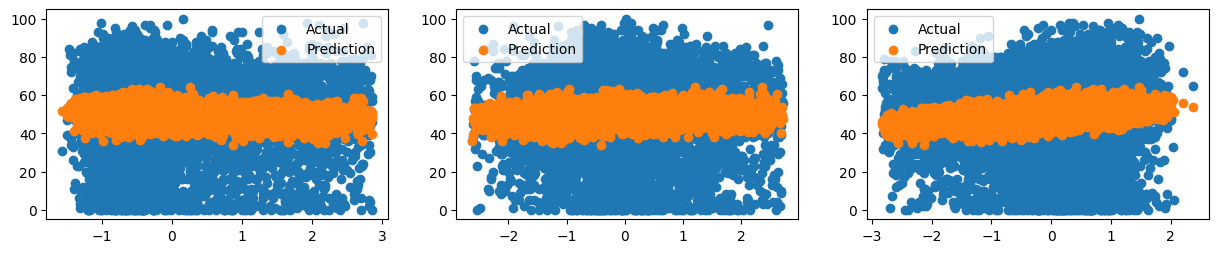



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.03718837012062659
Residual Sum of Squares (RSS) on Training set  ---> 2946922.186462853
Mean Squared Error (MSE) on Training set       ---> 411.58131095849905
Root Mean Squared Error (RMSE) on Training set ---> 20.28746684429821

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.0033984544902754266
Residual Sum of Squares (RSS) on Training set  ---> 745130.5947039996
Mean Squared Error (MSE) on Training set       ---> 416.27407525363105
Root Mean Squared Error (RMSE) on Training set ---> 20.402795770522015

--------------------Residual Plots--------------------


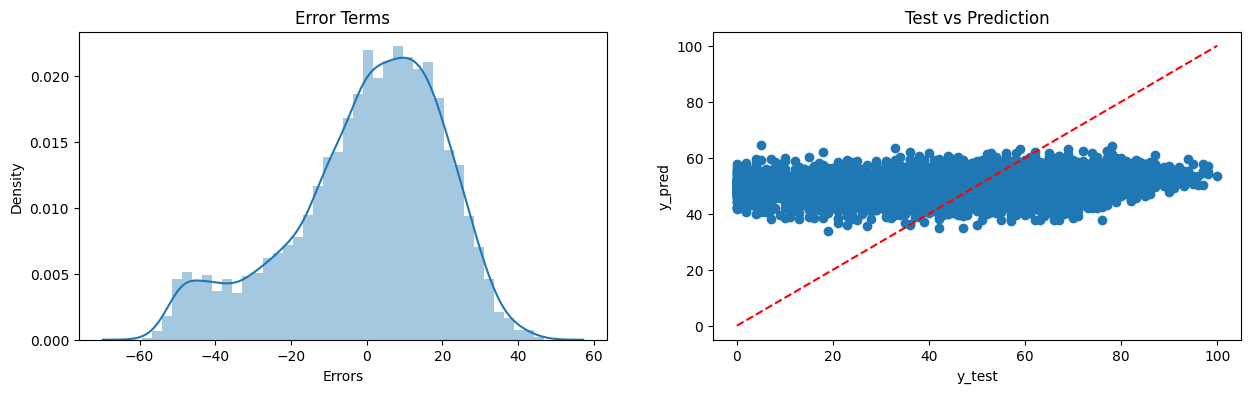

In [ ]:
#Linear Regression

MLR = LinearRegression().fit(Train_X_std,Train_Y)
pred1 = MLR.predict(Train_X_std)
pred2 = MLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Multiple Linear Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(0, pred1, pred2)

# 6b. Ridge Regression Model

<<<----------------------------------- Evaluating Ridge Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [ 6.77672263e-01 -1.60744127e+00  1.75154720e+00 -2.58358232e+00
 -3.29278041e-01 -6.27080890e-01  2.87528521e+00  4.38425559e-01
 -3.57823366e-01 -1.34144148e-01 -1.47480467e+00  4.45569265e+12
  1.62244298e+13  1.83997088e+13  7.88422119e+12  4.68380987e-01
 -5.86182547e-01 -1.59019536e-01  1.63865474e-01 -1.80961350e-01
  2.34737545e-01 -5.71126477e-01 -1.27103798e-01 -4.80636356e-01
  2.55413630e-01  3.36471137e-01]
The Intercept of the Regresion Model was found to be  50.29268095412101


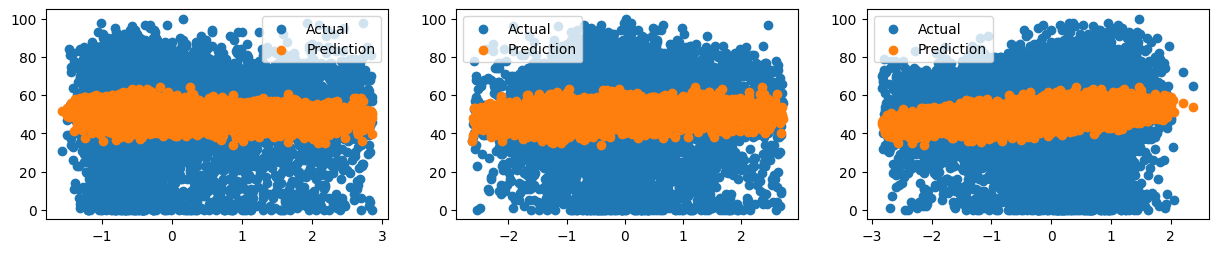



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.037189091772393934
Residual Sum of Squares (RSS) on Training set  ---> 2946919.977669837
Mean Squared Error (MSE) on Training set       ---> 411.5810024678543
Root Mean Squared Error (RMSE) on Training set ---> 20.28745924131098

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.0034207109152710746
Residual Sum of Squares (RSS) on Training set  ---> 745113.9542088411
Mean Squared Error (MSE) on Training set       ---> 416.2647788876207
Root Mean Squared Error (RMSE) on Training set ---> 20.40256794836426

--------------------Residual Plots--------------------


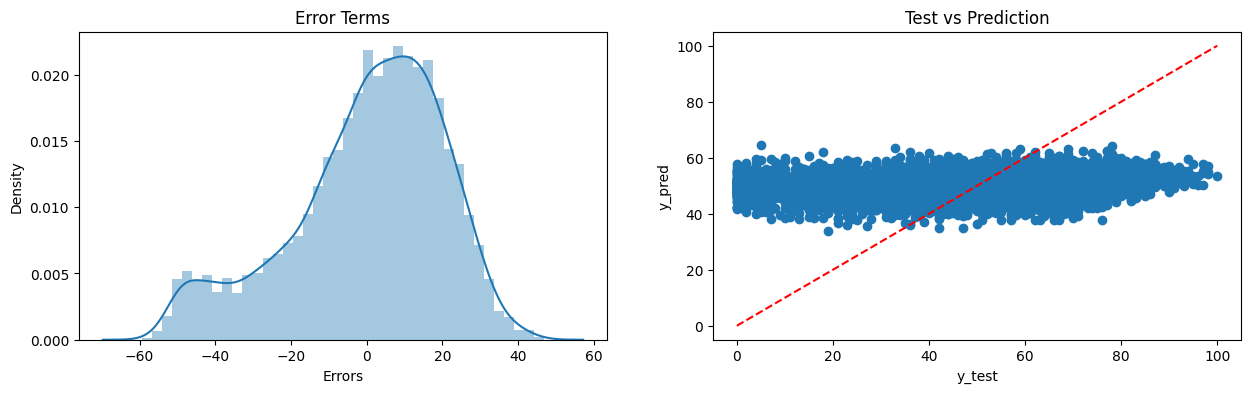

In [ ]:
#Creating a Ridge Regression model

RLR = Ridge().fit(Train_X_std,Train_Y)
pred1 = RLR.predict(Train_X_std)
pred2 = RLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Ridge Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(1, pred1, pred2)

# 6c. Lasso Regression Model

<<<----------------------------------- Evaluating Lasso Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [ 6.77672263e-01 -1.60744127e+00  1.75154720e+00 -2.58358232e+00
 -3.29278041e-01 -6.27080890e-01  2.87528521e+00  4.38425559e-01
 -3.57823366e-01 -1.34144148e-01 -1.47480467e+00  4.45569265e+12
  1.62244298e+13  1.83997088e+13  7.88422119e+12  4.68380987e-01
 -5.86182547e-01 -1.59019536e-01  1.63865474e-01 -1.80961350e-01
  2.34737545e-01 -5.71126477e-01 -1.27103798e-01 -4.80636356e-01
  2.55413630e-01  3.36471137e-01]
The Intercept of the Regresion Model was found to be  50.29268095412101


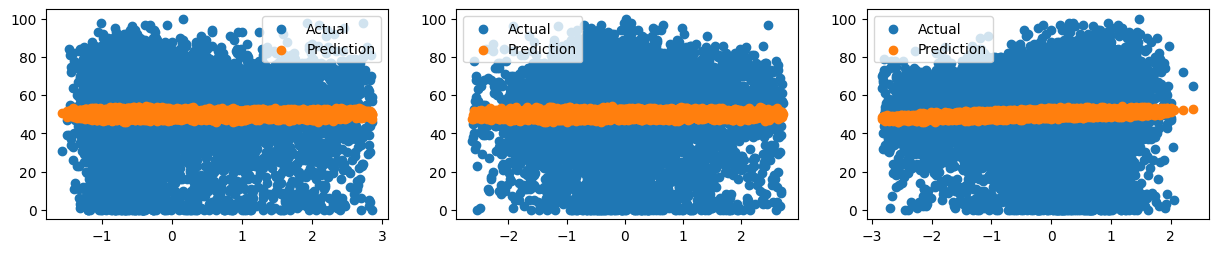



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.015140165780251126
Residual Sum of Squares (RSS) on Training set  ---> 3014406.14752641
Mean Squared Error (MSE) on Training set       ---> 421.00644518525286
Root Mean Squared Error (RMSE) on Training set ---> 20.51844158763654

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.007117147140071945
Residual Sum of Squares (RSS) on Training set  ---> 742350.234109388
Mean Squared Error (MSE) on Training set       ---> 414.72080117842904
Root Mean Squared Error (RMSE) on Training set ---> 20.364694968951266

--------------------Residual Plots--------------------


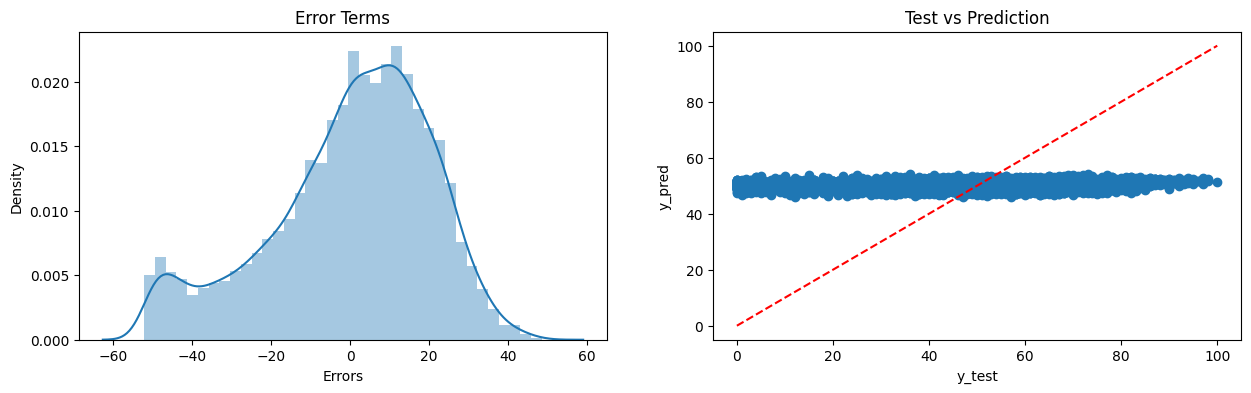

In [ ]:
#Creating a Ridge Regression model

LLR = Lasso().fit(Train_X_std,Train_Y)
pred1 = LLR.predict(Train_X_std)
pred2 = LLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Lasso Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(2, pred1, pred2)

6d. Elastic-Net Regression

<<<----------------------------------- Evaluating Elastic-Net Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [ 6.77672263e-01 -1.60744127e+00  1.75154720e+00 -2.58358232e+00
 -3.29278041e-01 -6.27080890e-01  2.87528521e+00  4.38425559e-01
 -3.57823366e-01 -1.34144148e-01 -1.47480467e+00  4.45569265e+12
  1.62244298e+13  1.83997088e+13  7.88422119e+12  4.68380987e-01
 -5.86182547e-01 -1.59019536e-01  1.63865474e-01 -1.80961350e-01
  2.34737545e-01 -5.71126477e-01 -1.27103798e-01 -4.80636356e-01
  2.55413630e-01  3.36471137e-01]
The Intercept of the Regresion Model was found to be  50.29268095412101


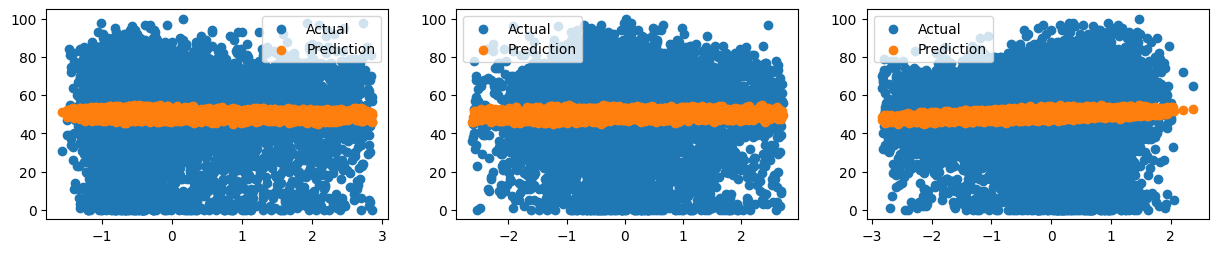



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.019205092299083293
Residual Sum of Squares (RSS) on Training set  ---> 3001964.438501573
Mean Squared Error (MSE) on Training set       ---> 419.26877632703537
Root Mean Squared Error (RMSE) on Training set ---> 20.476053729345296

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.007624464892474925
Residual Sum of Squares (RSS) on Training set  ---> 741970.9270731355
Mean Squared Error (MSE) on Training set       ---> 414.50889780622094
Root Mean Squared Error (RMSE) on Training set ---> 20.359491590072206

--------------------Residual Plots--------------------


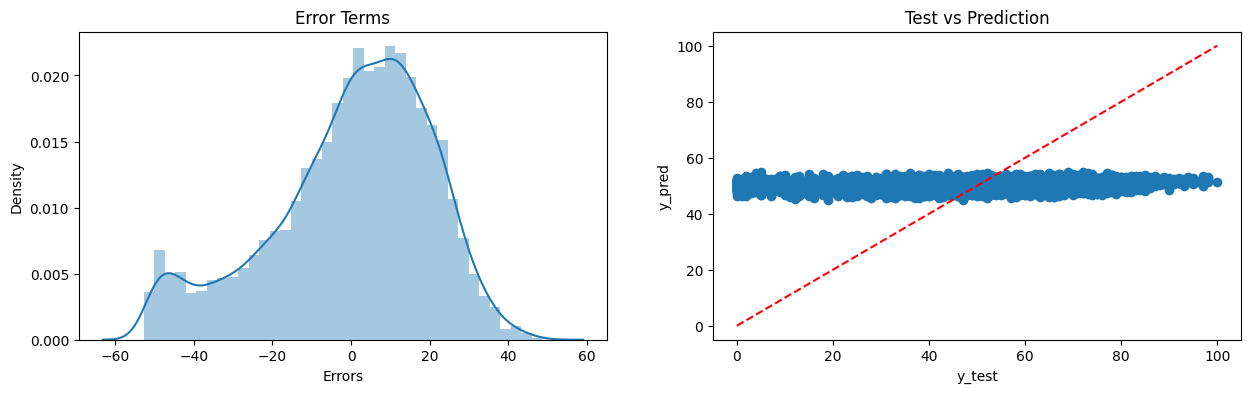

In [ ]:
#Creating a ElasticNet Regression model

ENR = ElasticNet().fit(Train_X_std,Train_Y)
pred1 = ENR.predict(Train_X_std)
pred2 = ENR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Elastic-Net Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(3, pred1, pred2)


# 6e. Polynomial Regression Model

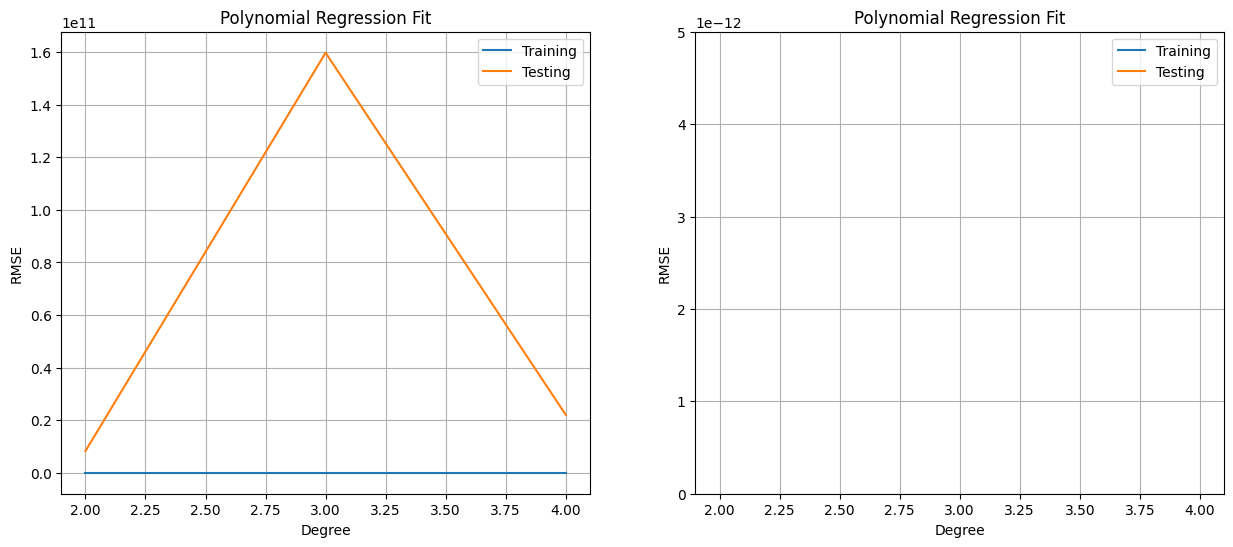

In [ ]:
#Checking polynomial regression performance on various degrees

Trr=[]; Tss=[]
n_degree=5

for i in range(2,n_degree):
    #print(f'{i} Degree')
    poly_reg = PolynomialFeatures(degree=i)
    X_poly = poly_reg.fit_transform(Train_X_std)
    X_poly1 = poly_reg.fit_transform(Test_X_std)
    LR = LinearRegression()
    LR.fit(X_poly, Train_Y)

    pred1 = LR.predict(X_poly)
    Trr.append(np.sqrt(mean_squared_error(Train_Y, pred1)))

    pred2 = LR.predict(X_poly1)
    Tss.append(np.sqrt(mean_squared_error(Test_Y, pred2)))

plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
plt.plot(range(2,n_degree),Trr, label='Training')
plt.plot(range(2,n_degree),Tss, label='Testing')
#plt.plot([1,4],[1,4],'b--')
plt.title('Polynomial Regression Fit')
#plt.ylim([0,5])
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.grid()
plt.legend()
#plt.xticks()

plt.subplot(1,2,2)
plt.plot(range(2,n_degree),Trr, label='Training')
plt.plot(range(2,n_degree),Tss, label='Testing')
plt.title('Polynomial Regression Fit')
plt.ylim([0,5e-12])
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.grid()
plt.legend()
#plt.xticks()
plt.show()

<<<----------------------------------- Evaluating Polynomial Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [ 6.77672263e-01 -1.60744127e+00  1.75154720e+00 -2.58358232e+00
 -3.29278041e-01 -6.27080890e-01  2.87528521e+00  4.38425559e-01
 -3.57823366e-01 -1.34144148e-01 -1.47480467e+00  4.45569265e+12
  1.62244298e+13  1.83997088e+13  7.88422119e+12  4.68380987e-01
 -5.86182547e-01 -1.59019536e-01  1.63865474e-01 -1.80961350e-01
  2.34737545e-01 -5.71126477e-01 -1.27103798e-01 -4.80636356e-01
  2.55413630e-01  3.36471137e-01]
The Intercept of the Regresion Model was found to be  50.29268095412101


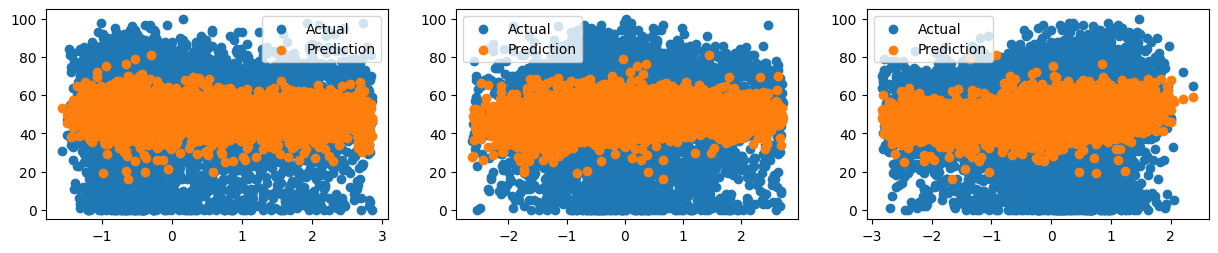



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.07763962035838079
Residual Sum of Squares (RSS) on Training set  ---> 2823111.1697526234
Mean Squared Error (MSE) on Training set       ---> 394.28926951852276
Root Mean Squared Error (RMSE) on Training set ---> 19.856718498244437

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> -1.6217484302645014e+17
Residual Sum of Squares (RSS) on Training set  ---> 1.2125351177186933e+23
Mean Squared Error (MSE) on Training set       ---> 6.773939205132366e+19
Root Mean Squared Error (RMSE) on Training set ---> 8230394404.360197

--------------------Residual Plots--------------------


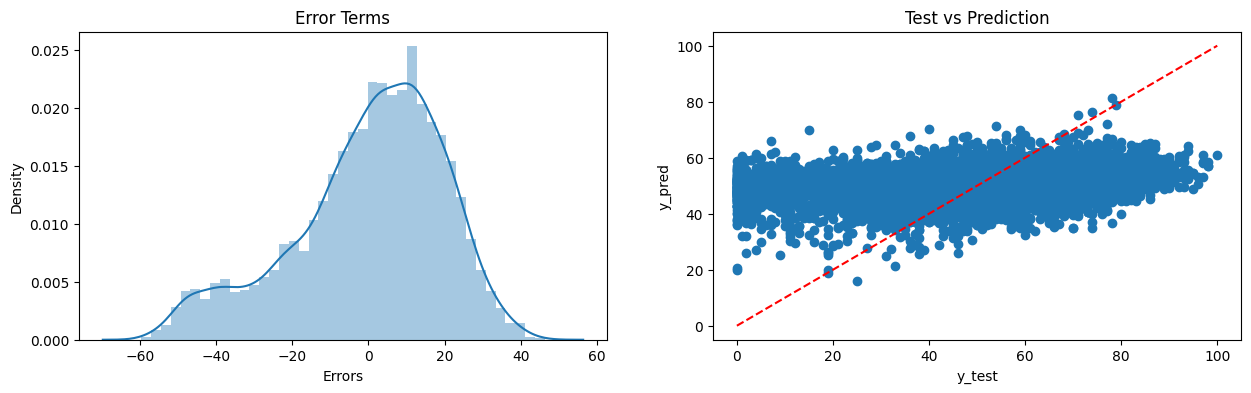

In [ ]:
#Using the 2nd Order Polynomial Regression model (degree=2)

poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(Train_X_std)
X_poly1 = poly_reg.fit_transform(Test_X_std)
PR = LinearRegression()
PR.fit(X_poly, Train_Y)

pred1 = PR.predict(X_poly)
pred2 = PR.predict(X_poly1)

print('{}{}\033[1m Evaluating Polynomial Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(4, pred1, pred2)

## 6f. Comparing the Evaluation Metics of the Models

In [ ]:
# Regression Models Results Evaluation

EMC = Model_Evaluation_Comparison_Matrix.copy()
EMC.index = ['Multiple Linear Regression (MLR)','Ridge Linear Regression (RLR)','Lasso Linear Regression (LLR)','Elastic-Net Regression (ENR)','Polynomial Regression (PNR)']
EMC

,Train-R2,Test-R2,Train-RSS,Test-RSS,Train-MSE,Test-MSE,Train-RMSE,Test-RMSE
Multiple Linear Regression (MLR),0.037188,3.398454e-03,2.946922e+06,7.451306e+05,411.581311,4.162741e+02,20.287467,2.040280e+01
Ridge Linear Regression (RLR),0.037189,3.420711e-03,2.946920e+06,7.451140e+05,411.581002,4.162648e+02,20.287459,2.040257e+01
Lasso Linear Regression (LLR),0.015140,7.117147e-03,3.014406e+06,7.423502e+05,421.006445,4.147208e+02,20.518442,2.036469e+01
Elastic-Net Regression (ENR),0.019205,7.624465e-03,3.001964e+06,7.419709e+05,419.268776,4.145089e+02,20.476054,2.035949e+01
Polynomial Regression (PNR),0.077640,-1.621748e+17,2.823111e+06,1.212535e+23,394.289270,6.773939e+19,19.856718,8.230394e+09


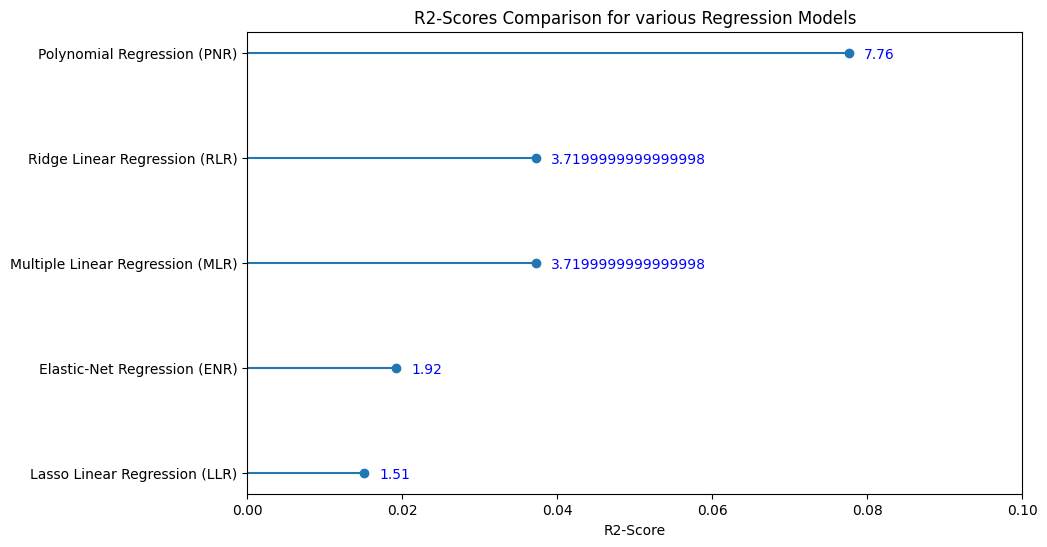

In [ ]:
# R2-Scores Comparison for different Regression Models

R2 = round(EMC['Train-R2'].sort_values(ascending=True),4)
plt.hlines(y=R2.index, xmin=0, xmax=R2.values)
plt.plot(R2.values, R2.index,'o')
plt.title('R2-Scores Comparison for various Regression Models')
plt.xlabel('R2-Score')
#plt.ylabel('Regression Models')
for i, v in enumerate(R2):
    plt.text(v+0.002, i-0.05, str(v*100), color='blue')
plt.xlim([0,0.1])
plt.show()


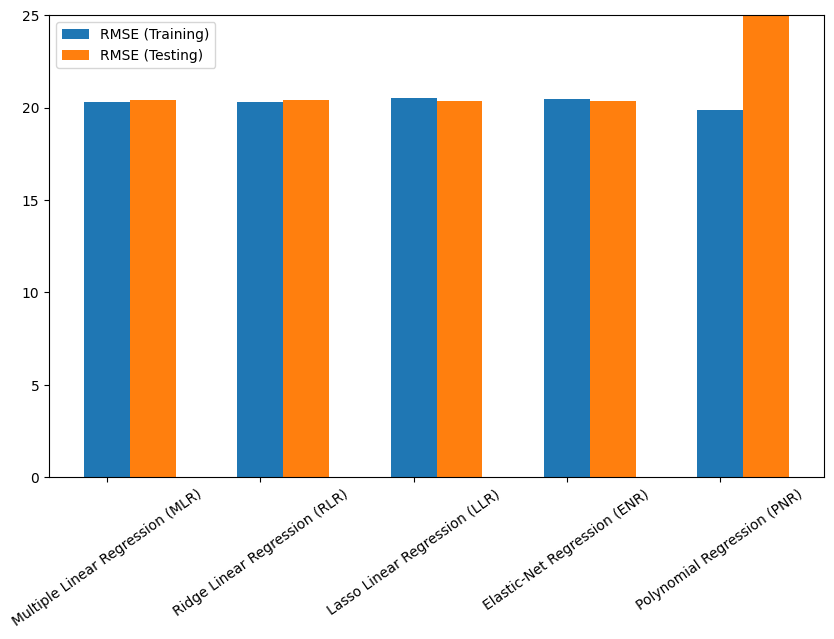

In [ ]:
# Root Mean SquaredError Comparison for different Regression Models

cc = Model_Evaluation_Comparison_Matrix.columns.values
s=5
plt.bar(np.arange(5), Model_Evaluation_Comparison_Matrix[cc[6]].values, width=0.3, label='RMSE (Training)')
plt.bar(np.arange(5)+0.3, Model_Evaluation_Comparison_Matrix[cc[7]].values, width=0.3, label='RMSE (Testing)')
plt.xticks(np.arange(5),EMC.index, rotation =35)
plt.legend()
plt.ylim([0,25])
plt.show()

# 7. Project Outcomes & Conclusions

Here are some of the key outcomes of the project:

The Dataset was quiet small with just 18835 samples & after preprocessing 33.4% of the datasamples were dropped.

Visualising the distribution of data & their relationships, helped us to get some insights on the feature-set.

The features had high multicollinearity, hence in Feature Extraction step, we shortlisted the appropriate features with VIF Technique.

Testing multiple algorithms with default hyperparamters gave us some understanding for various models performance on this specific dataset.

While, Polynomial Regression (Order-2) was the best choise, yet it is safe to use multiple regression algorithm, as their scores were quiet comparable & also they're more generalisable.
